In [2]:
%pip install sinling nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Read the Sinhala and English files separately
with open('dataset/sinhala.txt', 'r', encoding='utf-8') as sin_file:
    sinhala_sentences = sin_file.readlines()

with open('dataset/english.txt', 'r', encoding='utf-8') as eng_file:
    english_sentences = eng_file.readlines()

# Check if the files have the same number of sentences
if len(sinhala_sentences) != len(english_sentences):
    raise ValueError("The number of sentences in the two files is not the same.")

In [4]:
import nltk
import string
from sinling import SinhalaTokenizer

# Download the NLTK tokenizer
nltk.download('punkt')

# Preprocessing function for english sentences
def preprocess_en(sentence):
    tokens = nltk.word_tokenize(sentence)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in string.punctuation]
    return tokens

# Preprocessing function for sinhala sentences
def preprocess_si(sentence):
    tokenizer = SinhalaTokenizer()
    tokens = tokenizer.tokenize(sentence)
    tokens = [word for word in tokens if word not in string.punctuation]
    return tokens

# Preprocess Sinhala sentences
sinhala_tokens = [preprocess_si(sentence.strip()) for sentence in sinhala_sentences]

# Preprocess English sentences
english_tokens = [preprocess_en(sentence.strip()) for sentence in english_sentences]

# Display some preprocessed sentences for both languages
print("Sinhala tokens example:", sinhala_tokens[:5])
print("English tokens example:", english_tokens[:5])


Sinhala tokens example: [['බටහිර', 'ඉන්දීය', 'කොදෙව්', 'ක්\u200dරිකට්', 'කණ්ඩායම', 'විස්සයි20', 'ජාත්\u200dයන්තර', 'T20I', 'තරඟ', 'තුනකට', 'ක්\u200dරීඩා', 'කිරීම', 'සඳහා', '2018', 'අප්\u200dරේල්', 'මාසයේදී', 'පාකිස්තානයේ', 'සංචාරය', 'කළේය'], ['තරගමාලාව', 'පාකිස්තානය', 'ජය', 'ගත්තේය'], ['තරගාවලිය', 'අවසන්', 'වීමෙන්', 'පසු', 'පකිස්තාන', 'නායක', 'සර්ෆ්\u200dරාස්', 'අහමඩ්', 'ප්\u200dරකාශ', 'කළේ', 'ඉදිරියේදී', 'කිසිදු', 'කණ්ඩායමක්', 'ආරක්ෂාව', 'පිළිබඳ', 'කරුණු', 'නිදහසට', 'කරුණක්', 'ලෙස', 'භාවිත', 'නොකරන', 'බවයි.'], ['මේ', 'වසරේ', 'හෝ', 'ලබන', 'වසරේ', 'ජාත්\u200dයන්තර', 'ක්\u200dරිකට්', 'නැවත', 'පාකිස්තානයට', 'පැමිණෙනු', 'ඇත'], ['පාකිස්තාන', 'ක්\u200dරිකට්', 'පාලක', 'මණ්ඩලය', '2020', 'වන', 'විට', 'පූර්ණ', 'සාමාජික', 'කණ්ඩායමකට', 'එරෙහිව', 'පූර්ණ', 'ජාත්\u200dයන්තර', 'තරගාවලියක්', 'පාකිස්තානයේදී', 'ක්\u200dරීඩා', 'කිරීමට', 'බලාපොරොත්තු', 'වේ']]
English tokens example: [['the', 'west', 'indies', 'cricket', 'team', 'toured', 'pakistan', 'in', 'april', '2018', 'to', 'play', 'three', 'twenty20',

[nltk_data] Downloading package punkt to /home/madusha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from collections import Counter

# Flatten the list of tokens to calculate word frequency
sinhala_words = [word for sentence in sinhala_tokens for word in sentence]
english_words = [word for sentence in english_tokens for word in sentence]

# Count word frequencies
sinhala_freq = Counter(sinhala_words)
english_freq = Counter(english_words)

# Display the top 10 most frequent words for each corpus
print("Top 10 Sinhala words:", sinhala_freq.most_common(10))
print("Top 10 English words:", english_freq.most_common(10))


Top 10 Sinhala words: [('සහ', 462), ('අතර', 243), ('වන', 222), ('සඳහා', 179), ('කරන', 177), ('ලෙස', 157), ('වේ', 149), ('හෝ', 147), ('ඇති', 140), ('ඇත', 127)]
Top 10 English words: [('the', 1327), ('of', 715), ('and', 667), ('in', 573), ('a', 473), ('to', 392), ('is', 274), ('as', 222), ('with', 183), ('for', 178)]


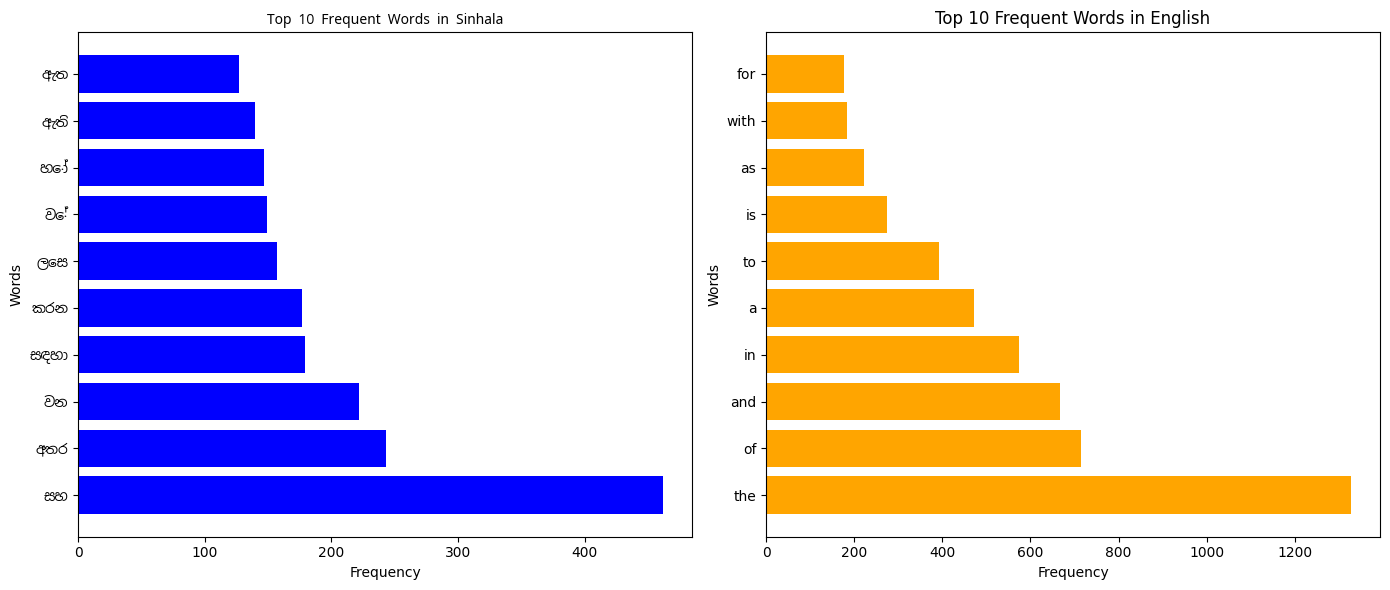

Sinhala words: [('සහ', 462), ('අතර', 243), ('වන', 222), ('සඳහා', 179), ('කරන', 177), ('ලෙස', 157), ('වේ', 149), ('හෝ', 147), ('ඇති', 140), ('ඇත', 127)]
English words: [('the', 1327), ('of', 715), ('and', 667), ('in', 573), ('a', 473), ('to', 392), ('is', 274), ('as', 222), ('with', 183), ('for', 178)]


In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# Load a Sinhala-supported font (e.g., Noto Sans Sinhala)
# Make sure to replace the path with the correct path to the font file
sinhala_font_path = "NotoSansSinhala.ttf"
sinhala_font = fm.FontProperties(fname=sinhala_font_path)

# Get the top 10 most frequent words from Sinhala and English corpora
sinhala_top_10 = sinhala_freq.most_common(10)
english_top_10 = english_freq.most_common(10)

# Separate words and frequencies for plotting
sinhala_words, sinhala_counts = zip(*sinhala_top_10)
english_words, english_counts = zip(*english_top_10)

# Create subplots for the two languages
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Sinhala word frequencies
ax[0].barh(sinhala_words, sinhala_counts, color='blue')
ax[0].set_title('Top 10 Frequent Words in Sinhala', fontproperties=sinhala_font)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Words')
# Apply the Sinhala font to y-axis labels
ax[0].tick_params(axis='y', labelsize=10)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(sinhala_font)

# Plot English word frequencies
ax[1].barh(english_words, english_counts, color='orange')
ax[1].set_title('Top 10 Frequent Words in English')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Words')

# Show the plots
plt.tight_layout()
plt.show()

print("Sinhala words:", sinhala_top_10)
print("English words:", english_top_10)

In [14]:
# Sort words by frequency in descending order
sinhala_sorted = sorted(sinhala_freq.items(), key=lambda x: x[1], reverse=True)
english_sorted = sorted(english_freq.items(), key=lambda x: x[1], reverse=True)

# Assign ranks to each word in both languages
sinhala_ranked = [(word, freq, rank + 1) for rank, (word, freq) in enumerate(sinhala_sorted)]
english_ranked = [(word, freq, rank + 1) for rank, (word, freq) in enumerate(english_sorted)]

# Display the top 10 ranked words for each corpus
print("Top 10 ranked Sinhala words:", sinhala_ranked[:10])
print("Top 10 ranked English words:", english_ranked[:10])


Top 10 ranked Sinhala words: [('සහ', 462, 1), ('අතර', 243, 2), ('වන', 222, 3), ('සඳහා', 179, 4), ('කරන', 177, 5), ('ලෙස', 157, 6), ('වේ', 149, 7), ('හෝ', 147, 8), ('ඇති', 140, 9), ('ඇත', 127, 10)]
Top 10 ranked English words: [('the', 1327, 1), ('of', 715, 2), ('and', 667, 3), ('in', 573, 4), ('a', 473, 5), ('to', 392, 6), ('is', 274, 7), ('as', 222, 8), ('with', 183, 9), ('for', 178, 10)]


In [15]:
# Calculate f * r for the top 25 words
sinhala_zipf = [(word, freq * rank) for word, freq, rank in sinhala_ranked[:25]]
english_zipf = [(word, freq * rank) for word, freq, rank in english_ranked[:25]]

# Display the Zipf results
print("Sinhala Zipf's Law results (f * r):", sinhala_zipf)
print("English Zipf's Law results (f * r):", english_zipf)


Sinhala Zipf's Law results (f * r): [('සහ', 462), ('අතර', 486), ('වන', 666), ('සඳහා', 716), ('කරන', 885), ('ලෙස', 942), ('වේ', 1043), ('හෝ', 1176), ('ඇති', 1260), ('ඇත', 1270), ('විය', 1254), ('එය', 1344), ('ශ්\u200dරී', 1300), ('කර', 1302), ('කිරීම', 1320), ('විට', 1360), ('වූ', 1411), ('භාවිතා', 1494), ('කළ', 1558), ('කරයි', 1640), ('කිරීමට', 1701), ('බොහෝ', 1782), ('මෙම', 1794), ('ලද', 1872), ('දී', 1925)]
English Zipf's Law results (f * r): [('the', 1327), ('of', 1430), ('and', 2001), ('in', 2292), ('a', 2365), ('to', 2352), ('is', 1918), ('as', 1776), ('with', 1647), ('for', 1780), ('are', 1672), ('or', 1800), ('by', 1768), ('from', 1568), ('that', 1665), ('was', 1760), ('it', 1853), ('on', 1890), ('sri', 1900), ('an', 1960), ('be', 1890), ('which', 1958), ('also', 1817), ('lanka', 1776), ('at', 1825)]


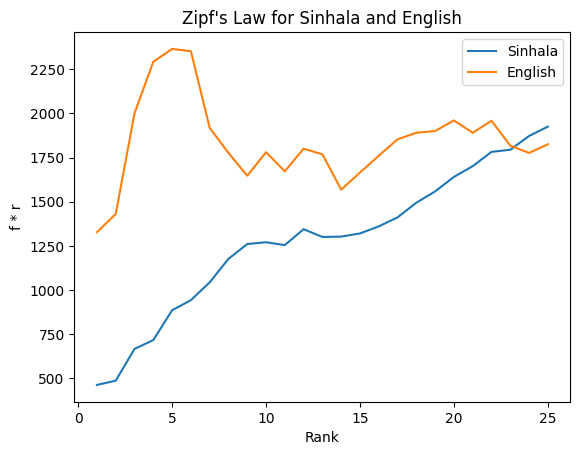

In [16]:
import matplotlib.pyplot as plt

# Extract the f * r values for plotting
sinhala_fr = [freq * rank for _, freq, rank in sinhala_ranked[:25]]
english_fr = [freq * rank for _, freq, rank in english_ranked[:25]]

# Plot the Zipf's Law results
plt.plot(range(1, 26), sinhala_fr, label='Sinhala')
plt.plot(range(1, 26), english_fr, label='English')
plt.xlabel('Rank')
plt.ylabel('f * r')
plt.title("Zipf's Law for Sinhala and English")
plt.legend()
plt.show()
